# Load the datasets

In [568]:
#importing dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

In [569]:
full_df = pd.read_csv("/content/housing.csv")

In [570]:
print("Dataset Head:")
full_df.head()

Dataset Head:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [571]:
print("Dataset tail:")
full_df.tail()

Dataset tail:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# Exploratory Data Analysis (EDA)

#### Exploring the various colomuns of the dataset. 

In [572]:
# list(data) or
list(full_df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [573]:
full_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can see that we have a total of 9 columns, let us iterate over each column and analyse them to understand the dataset better! 

1. longitude: A measure of how far west a house is; a more negative value is farther west
2. 	A measure of how far north a house is; a higher value is farther north
3. Median age of a house within a block; a lower number is a newer building
4. Total number of rooms within a block
5. Total number of bedrooms within a block
6. Total number of people residing within a block
7. Total number of households, a group of people residing within a home unit, for a block
8. Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. Median house value for households within a block (measured in US Dollars)

## Identifying any missing data

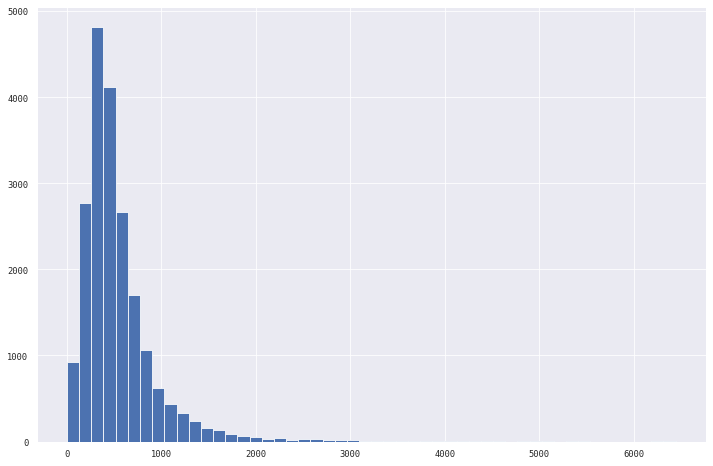

In [574]:
total_bedroms = full_df[full_df["total_bedrooms"].notnull()]["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

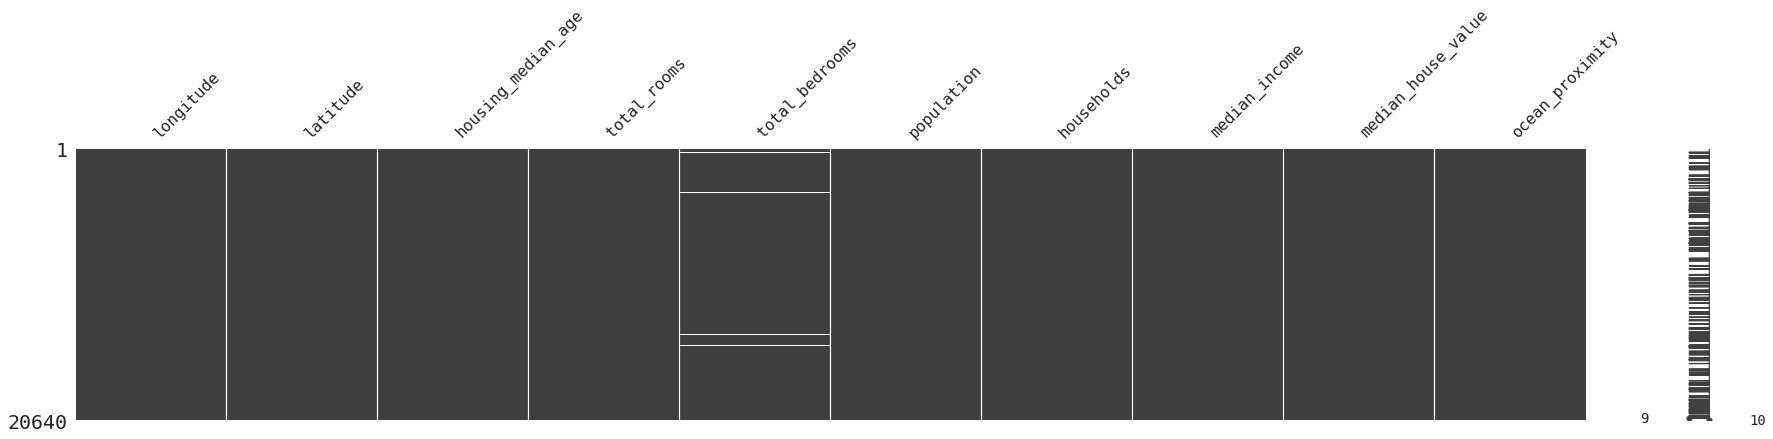

In [575]:
#Plot graphic of missing
import missingno
missingno.matrix(full_df, figsize = (30,5))

Total bedrooms has some missing data. 

In [576]:
#finding number of missing values 
full_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Bedrooms has only 270 missing values. As this is a categorical variable, we can replace missing data with mode value ie we are going to fill missing values with most common bedroom value

In [577]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

Writing a helper function to see the missing the missing data.

In [578]:
print("Missing data")
missingdata(full_df)

Missing data


,Total,Percent
total_bedrooms,207,1.002907


In [579]:
print(full_df.iloc[:,4:5].head())
full_df['total_bedrooms'].fillna(full_df['total_bedrooms'].median(), inplace = True)
full_df.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#Feature Engineering

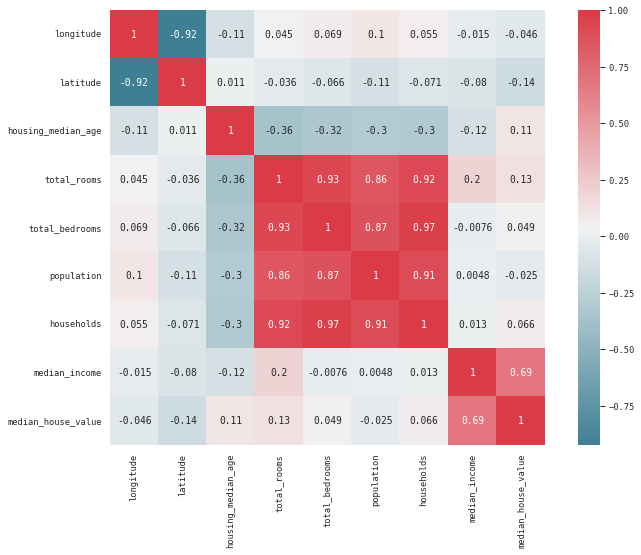

In [580]:
sns.set(context="paper",font="monospace")
full_df_corr_matrix = full_df.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(full_df_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True);

In [581]:
column = "total_rooms" 
des = full_df[column].describe()
desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
Q1 = des[desPairs['25']]
Q3 = des[desPairs['75']]
IQR = Q3-Q1
lowerBound = Q1-1.5*IQR
upperBound = Q3+1.5*IQR
print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
data = full_df[(full_df [column] < lowerBound) | (full_df [column] > upperBound)]
print("Outliers out of total = {} are \n {}".format(full_df[column].size,len(data[column])))
outlierRemoved = full_df[~full_df[column].isin(data[column])]

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


In [582]:
## Label encode for categorical feature (ocean_proximity)

labelEncoder = LabelEncoder()
print(full_df["ocean_proximity"].value_counts())
full_df["ocean_proximity"] = labelEncoder.fit_transform(full_df["ocean_proximity"])

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [583]:
X = full_df.drop('median_house_value', axis=1)
y = full_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

# Model
Price prediction is continous values hence use linear regression algorithms 

In [584]:
linearRegModel = LinearRegression()
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
print('The Accuracy of the model')
linearRegModel.score(X_test, y_test)

The Accuracy of the model


0.6458760192528002